# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [3]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

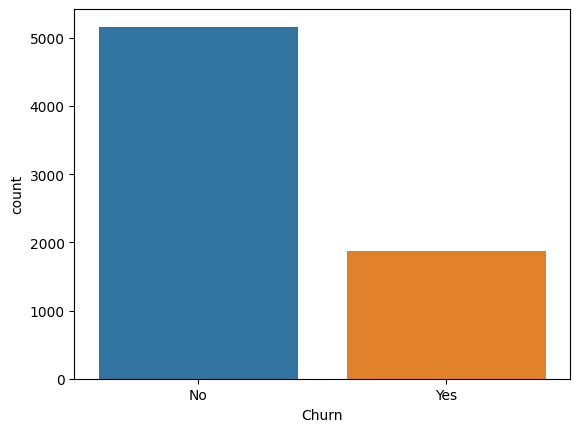

In [9]:
sns.countplot(x=df['Churn'], hue=df['Churn'])
plt.show()

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

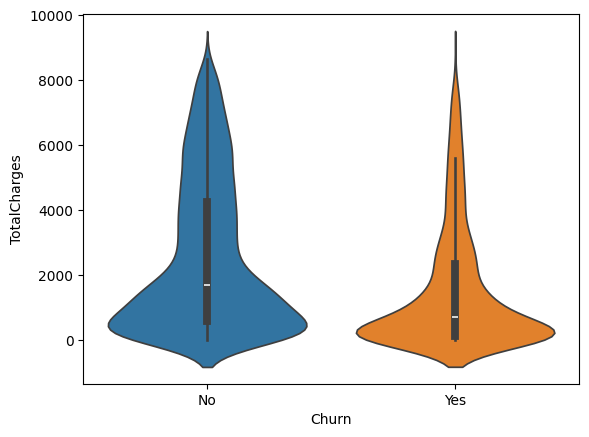

In [10]:
sns.violinplot(x=df['Churn'], y=df['TotalCharges'],hue = df['Churn'])
plt.show()

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

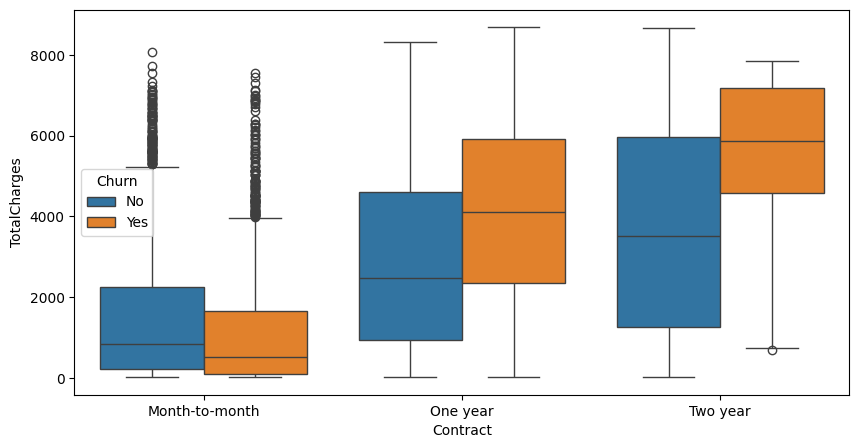

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Contract'], y = df['TotalCharges'], hue = df['Churn'])
plt.show()

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [12]:
new_data = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
new_data = pd.get_dummies(new_data)
new_data

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,True,False,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,False,True,True,False,True,False,False,True,True,...,True,False,True,False,False,False,False,True,True,False
2,0,False,True,True,False,True,False,False,True,True,...,False,False,False,True,False,False,False,True,False,True
3,0,False,True,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,True,False,True,False,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,True,True,False
7028,0,True,False,False,True,False,True,False,True,False,...,True,False,False,True,False,True,False,False,True,False
7029,0,True,False,False,True,False,True,True,False,False,...,False,False,False,True,False,False,True,False,True,False
7030,1,False,True,False,True,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [13]:
new_data_corr = new_data.corr()

In [14]:
new_data_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

C:\Users\Asus\AppData\Local\Temp\ipykernel_14652\1708554115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= new_data_corr['Churn_Yes'].sort_values().iloc[1:-1].index, y= new_data_corr['Churn_Yes'].sort_values().iloc[1:-1].values, palette= "husl")


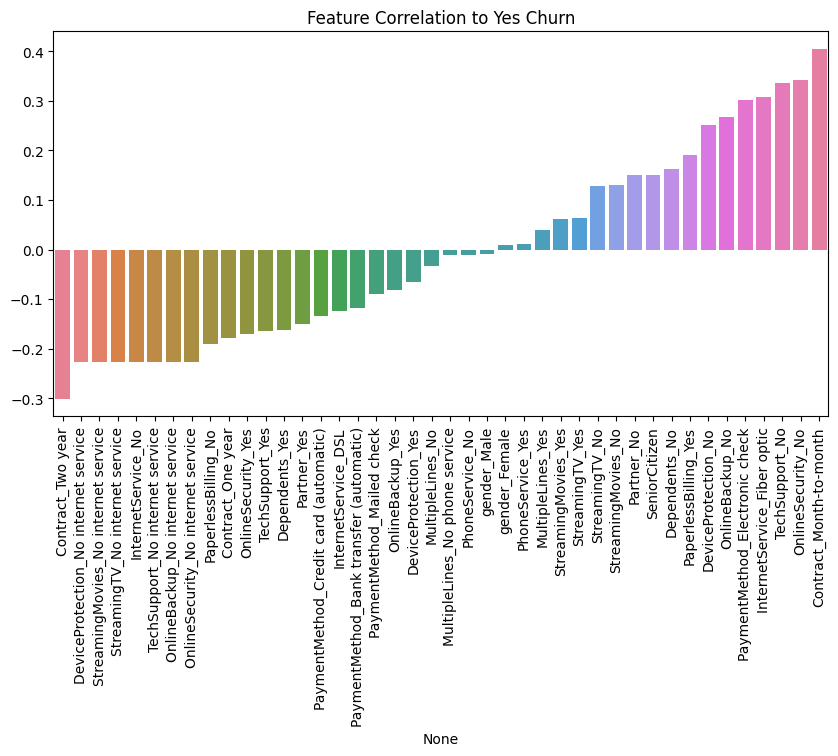

In [15]:
plt.figure(figsize=(10,5))
plt.title('Feature Correlation to Yes Churn')
sns.barplot(x= new_data_corr['Churn_Yes'].sort_values().iloc[1:-1].index, y= new_data_corr['Churn_Yes'].sort_values().iloc[1:-1].values, palette= "husl")
plt.xticks (rotation= 90 )
plt.show()

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

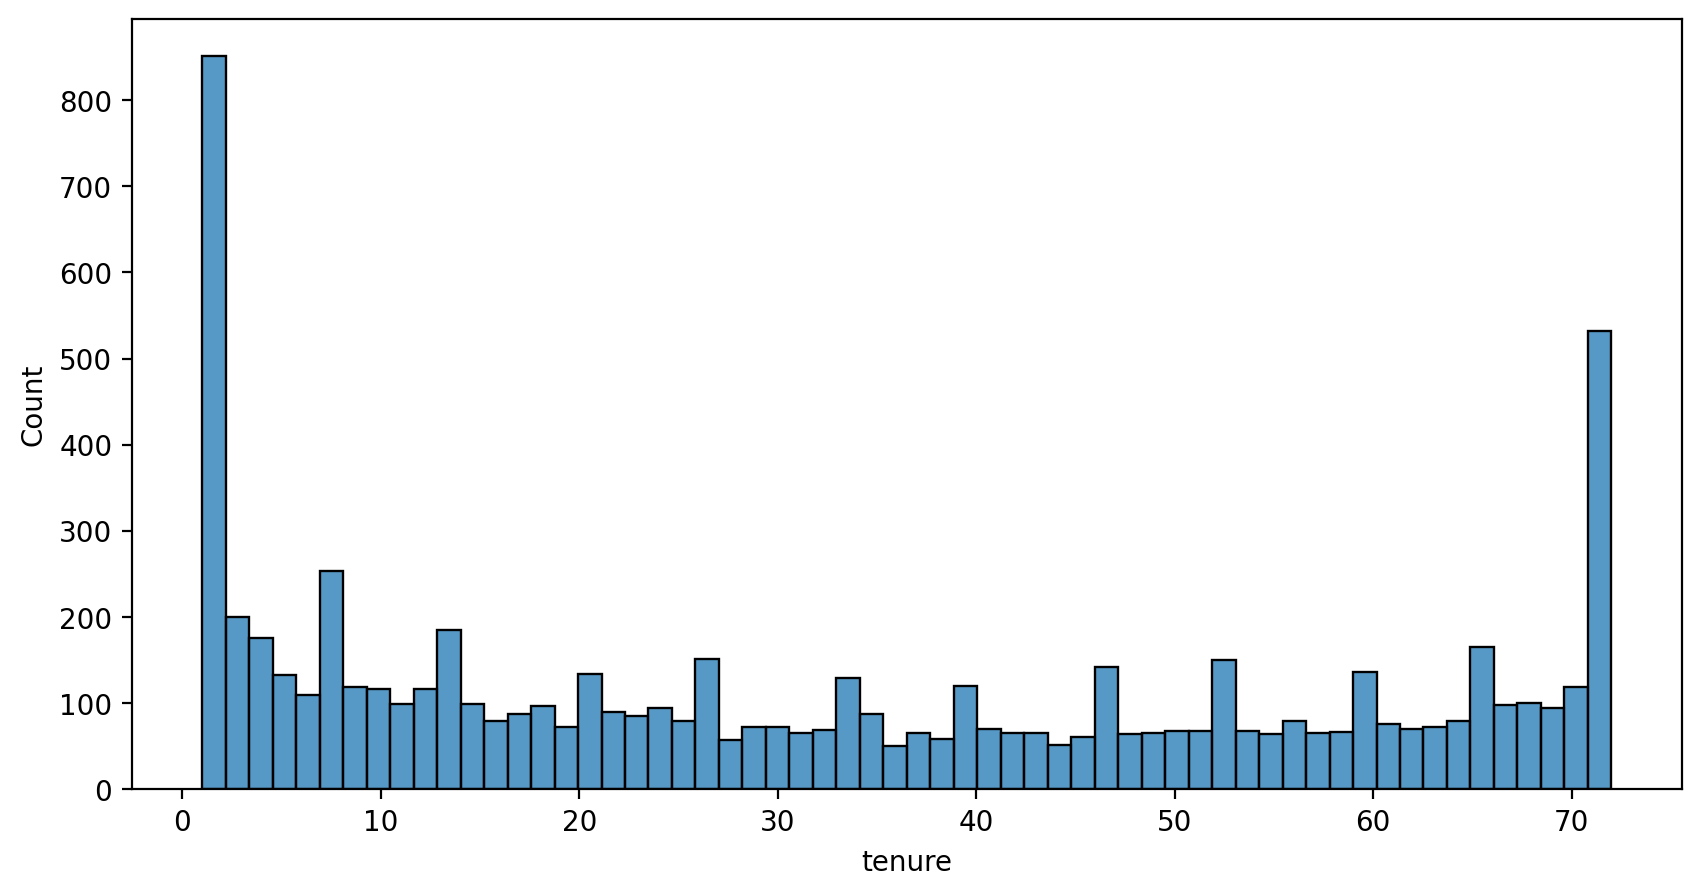

In [17]:
plt.figure(figsize=(10, 5), dpi = 200)
sns.histplot(x = df['tenure'], bins = 60)
plt.show()

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

<Figure size 2000x1000 with 0 Axes>

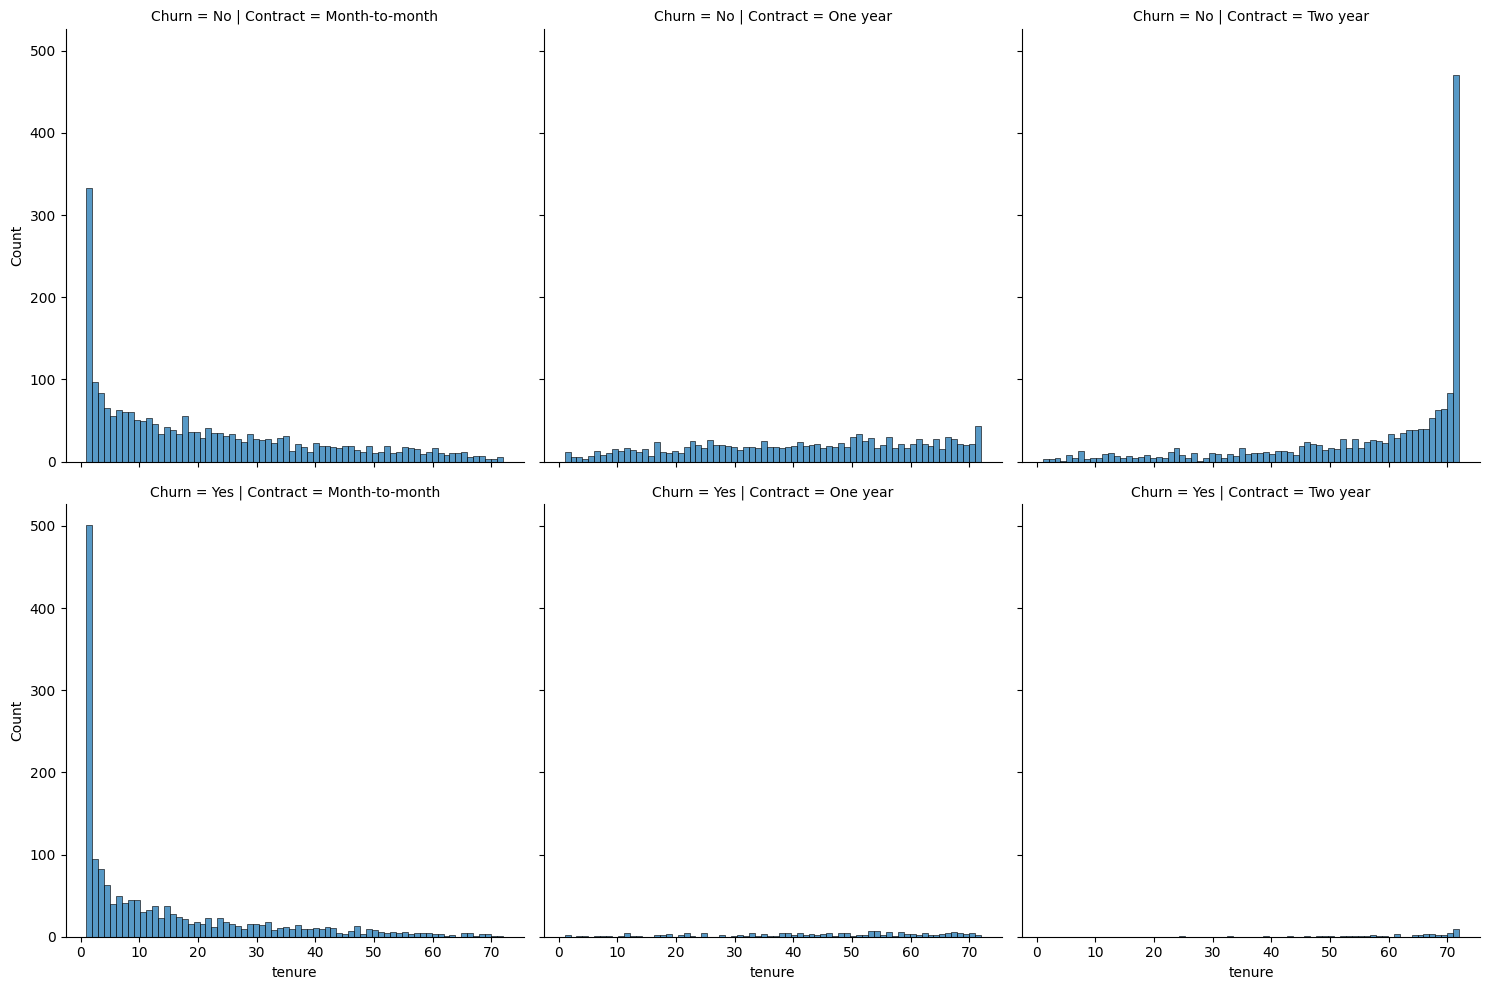

In [18]:
plt.figure(figsize=(10, 5), dpi = 200)
sns.displot(x = df['tenure'], bins = 70, row = df['Churn'], col= df['Contract'] )
plt.show()

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

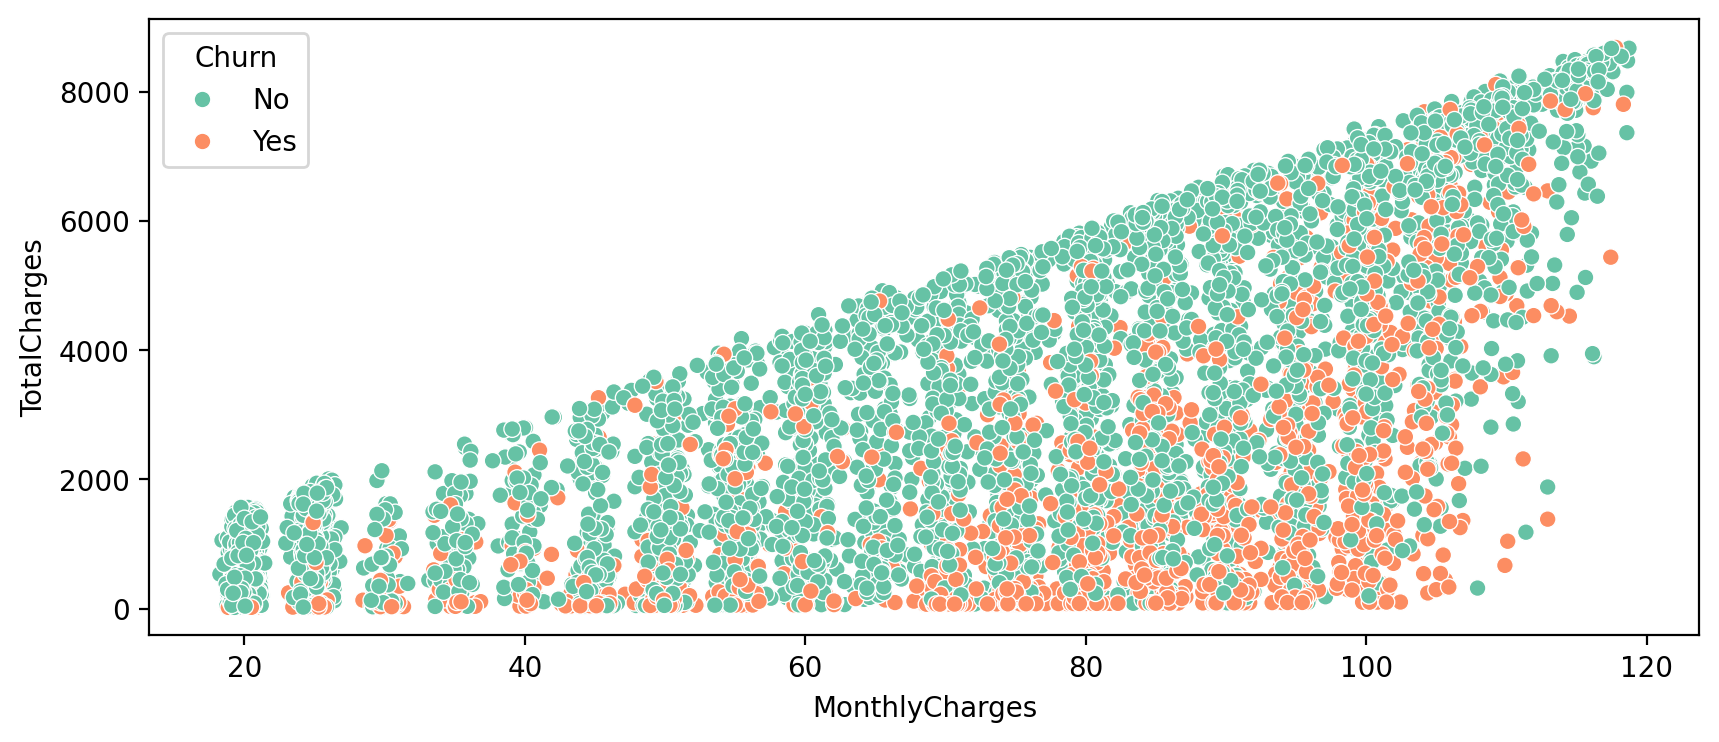

In [19]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(x = df['MonthlyCharges'], y = df['TotalCharges'], hue = df['Churn'], palette ='Set2' )
plt.show()

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [20]:
yes = df[df['Churn'] == 'Yes'].groupby('tenure').size() 
obshi = df.groupby('tenure')['Churn'].size()
result = yes / obshi * 100

In [21]:
result

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

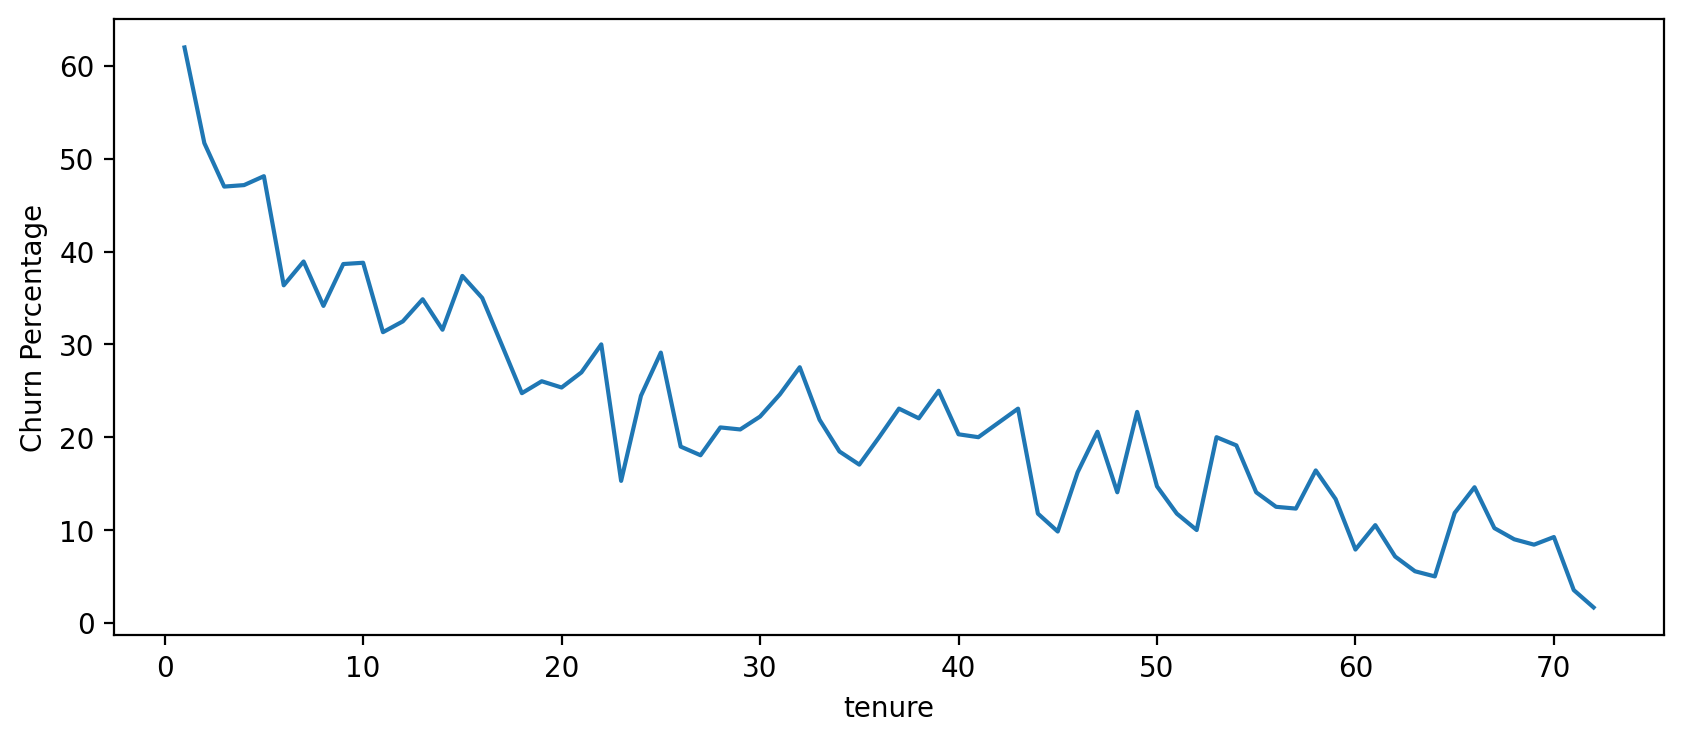

In [22]:
plt.figure(figsize=(10, 4), dpi = 200)
plt.plot(sorted(df['tenure'].unique()), result)
plt.xlabel("tenure")
plt.ylabel("Churn Percentage")
plt.show()

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [23]:
df_seg = pd.DataFrame(data=df['tenure'].values, columns=['tenure'])
df_seg

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7027,24
7028,72
7029,11
7030,4


In [24]:
def Ten_Coh(data):
    if 0 <= data['tenure'] <= 12:
        return '0-12 Months'
    elif 12 <= data['tenure'] <= 24:
        return '12-24 Months'
    elif 24 <= data['tenure'] <= 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [25]:
df_seg['Tenure Cohort'] = df_seg.apply(Ten_Coh, axis=1)

In [26]:
df_seg.head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Задание: Постройте график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

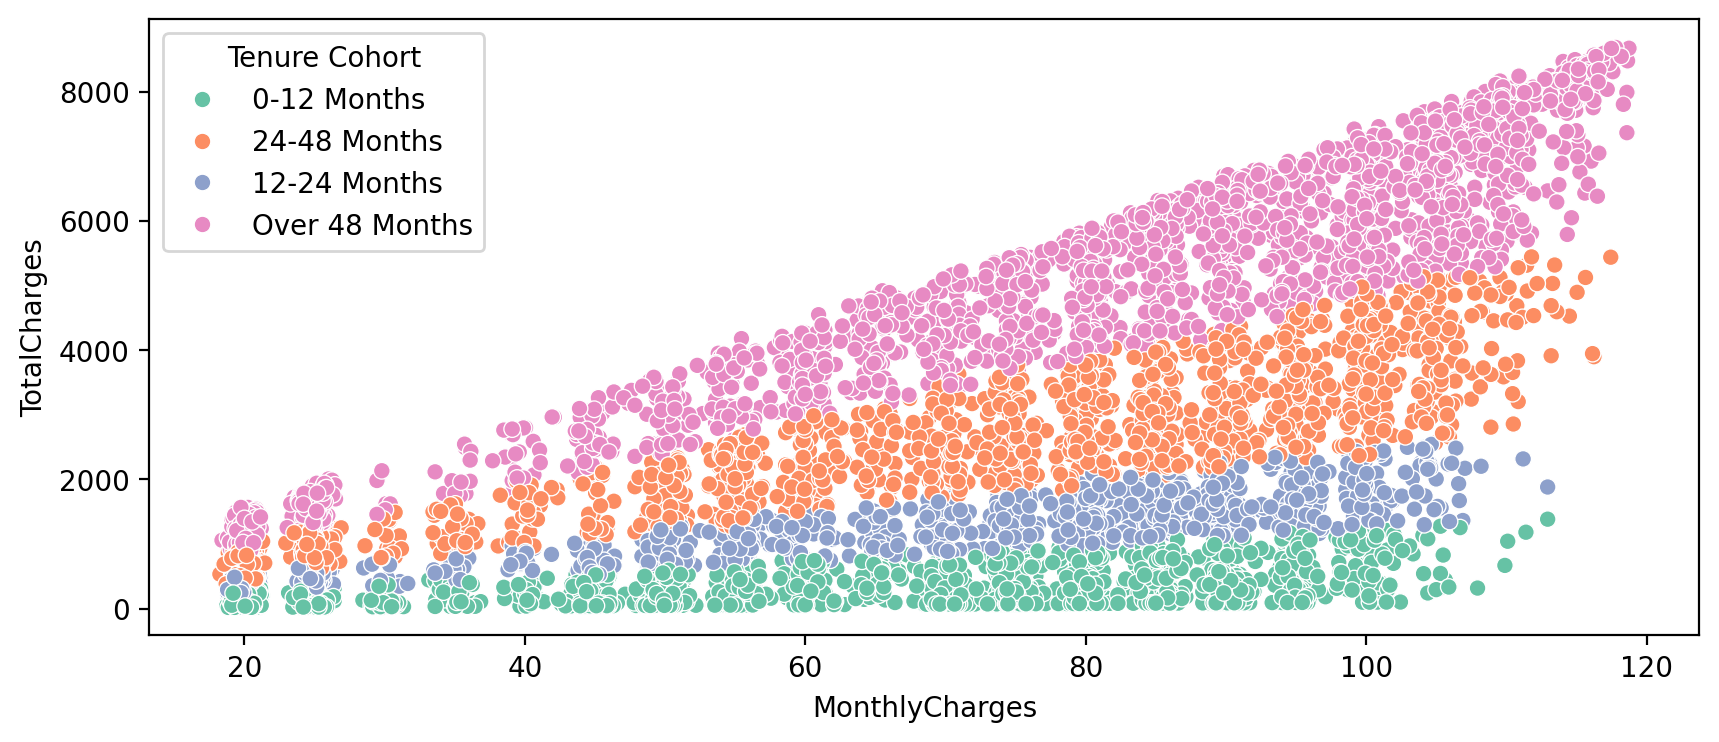

In [27]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.scatterplot(x = df['MonthlyCharges'], y = df['TotalCharges'], hue = df_seg['Tenure Cohort'], palette='Set2' )
plt.show()

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

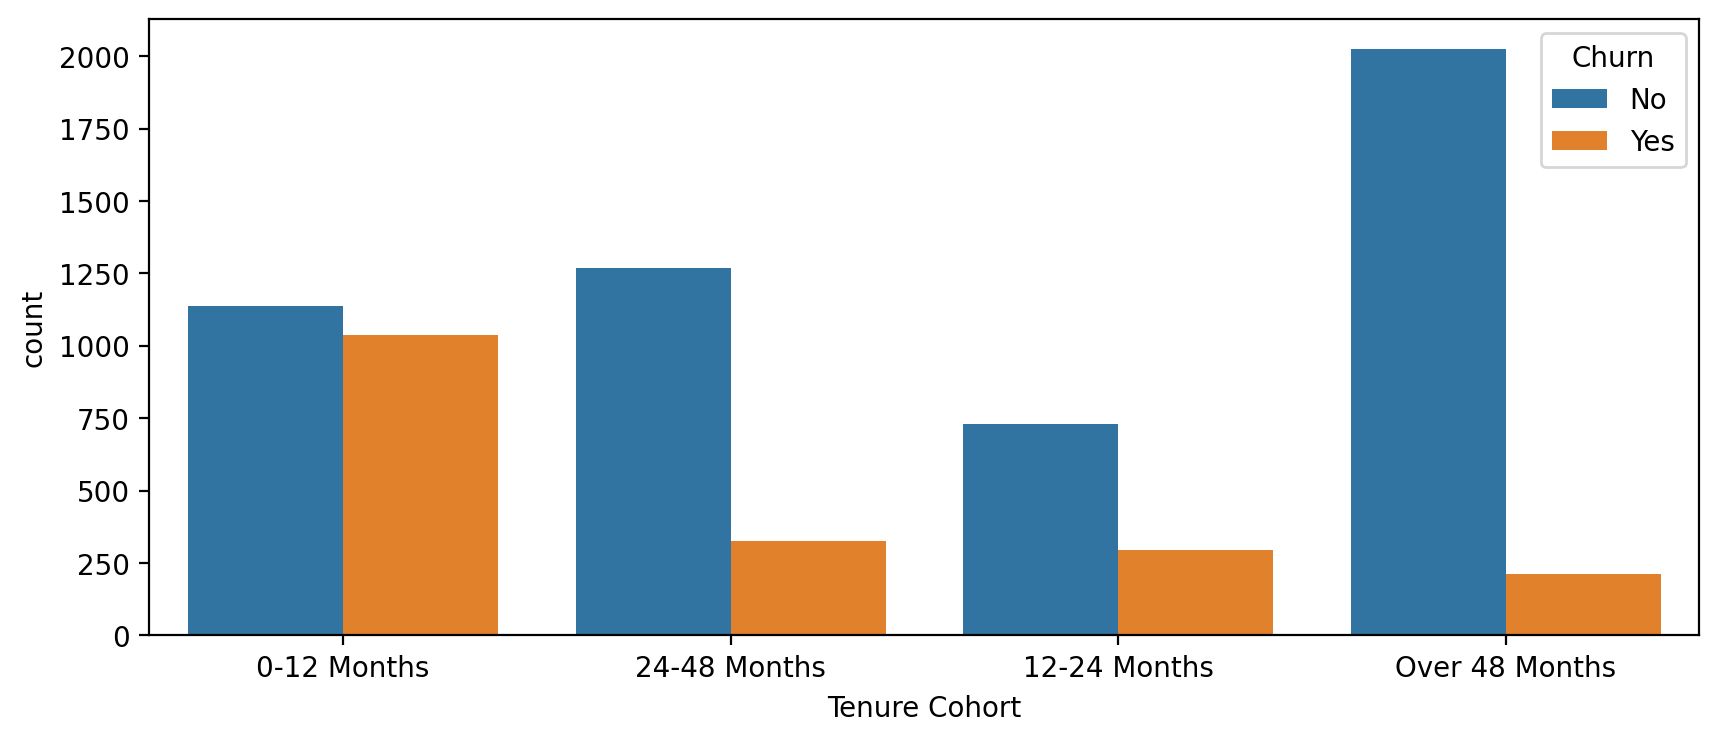

In [28]:
plt.figure(figsize=(10, 4), dpi = 200)
sns.countplot(x = df_seg['Tenure Cohort'], hue = df['Churn'])
plt.show()

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

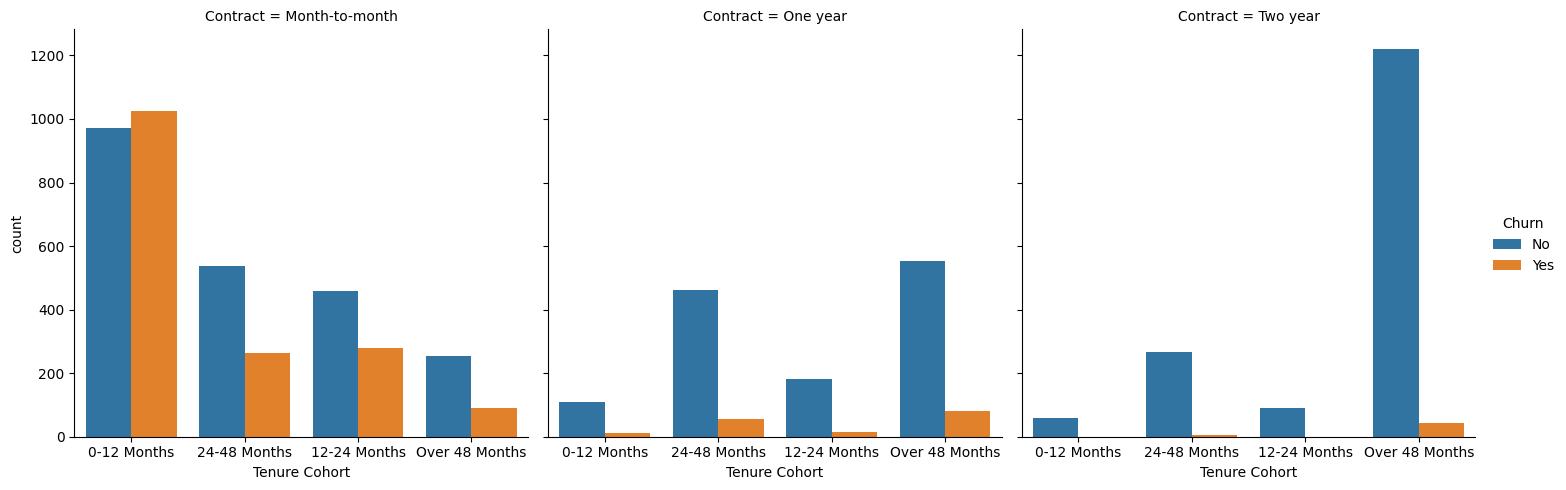

In [29]:
sns.catplot(x = df_seg['Tenure Cohort'], hue = df['Churn'], col = df['Contract'], kind = 'count');

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [30]:
df = df.drop('customerID', axis = 1)

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [32]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = label.fit_transform(df[i])

In [33]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model_1 = DecisionTreeClassifier(max_depth= 6)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [40]:
y_pred_1 = model_1.predict(X_test)

In [41]:
print(classification_report(y_pred_1, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       550
           1       0.53      0.51      0.52       154

    accuracy                           0.79       704
   macro avg       0.70      0.69      0.69       704
weighted avg       0.79      0.79      0.79       704



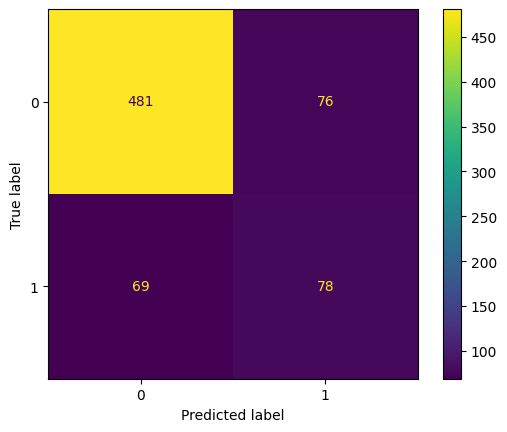

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_1)).plot()
plt.show()

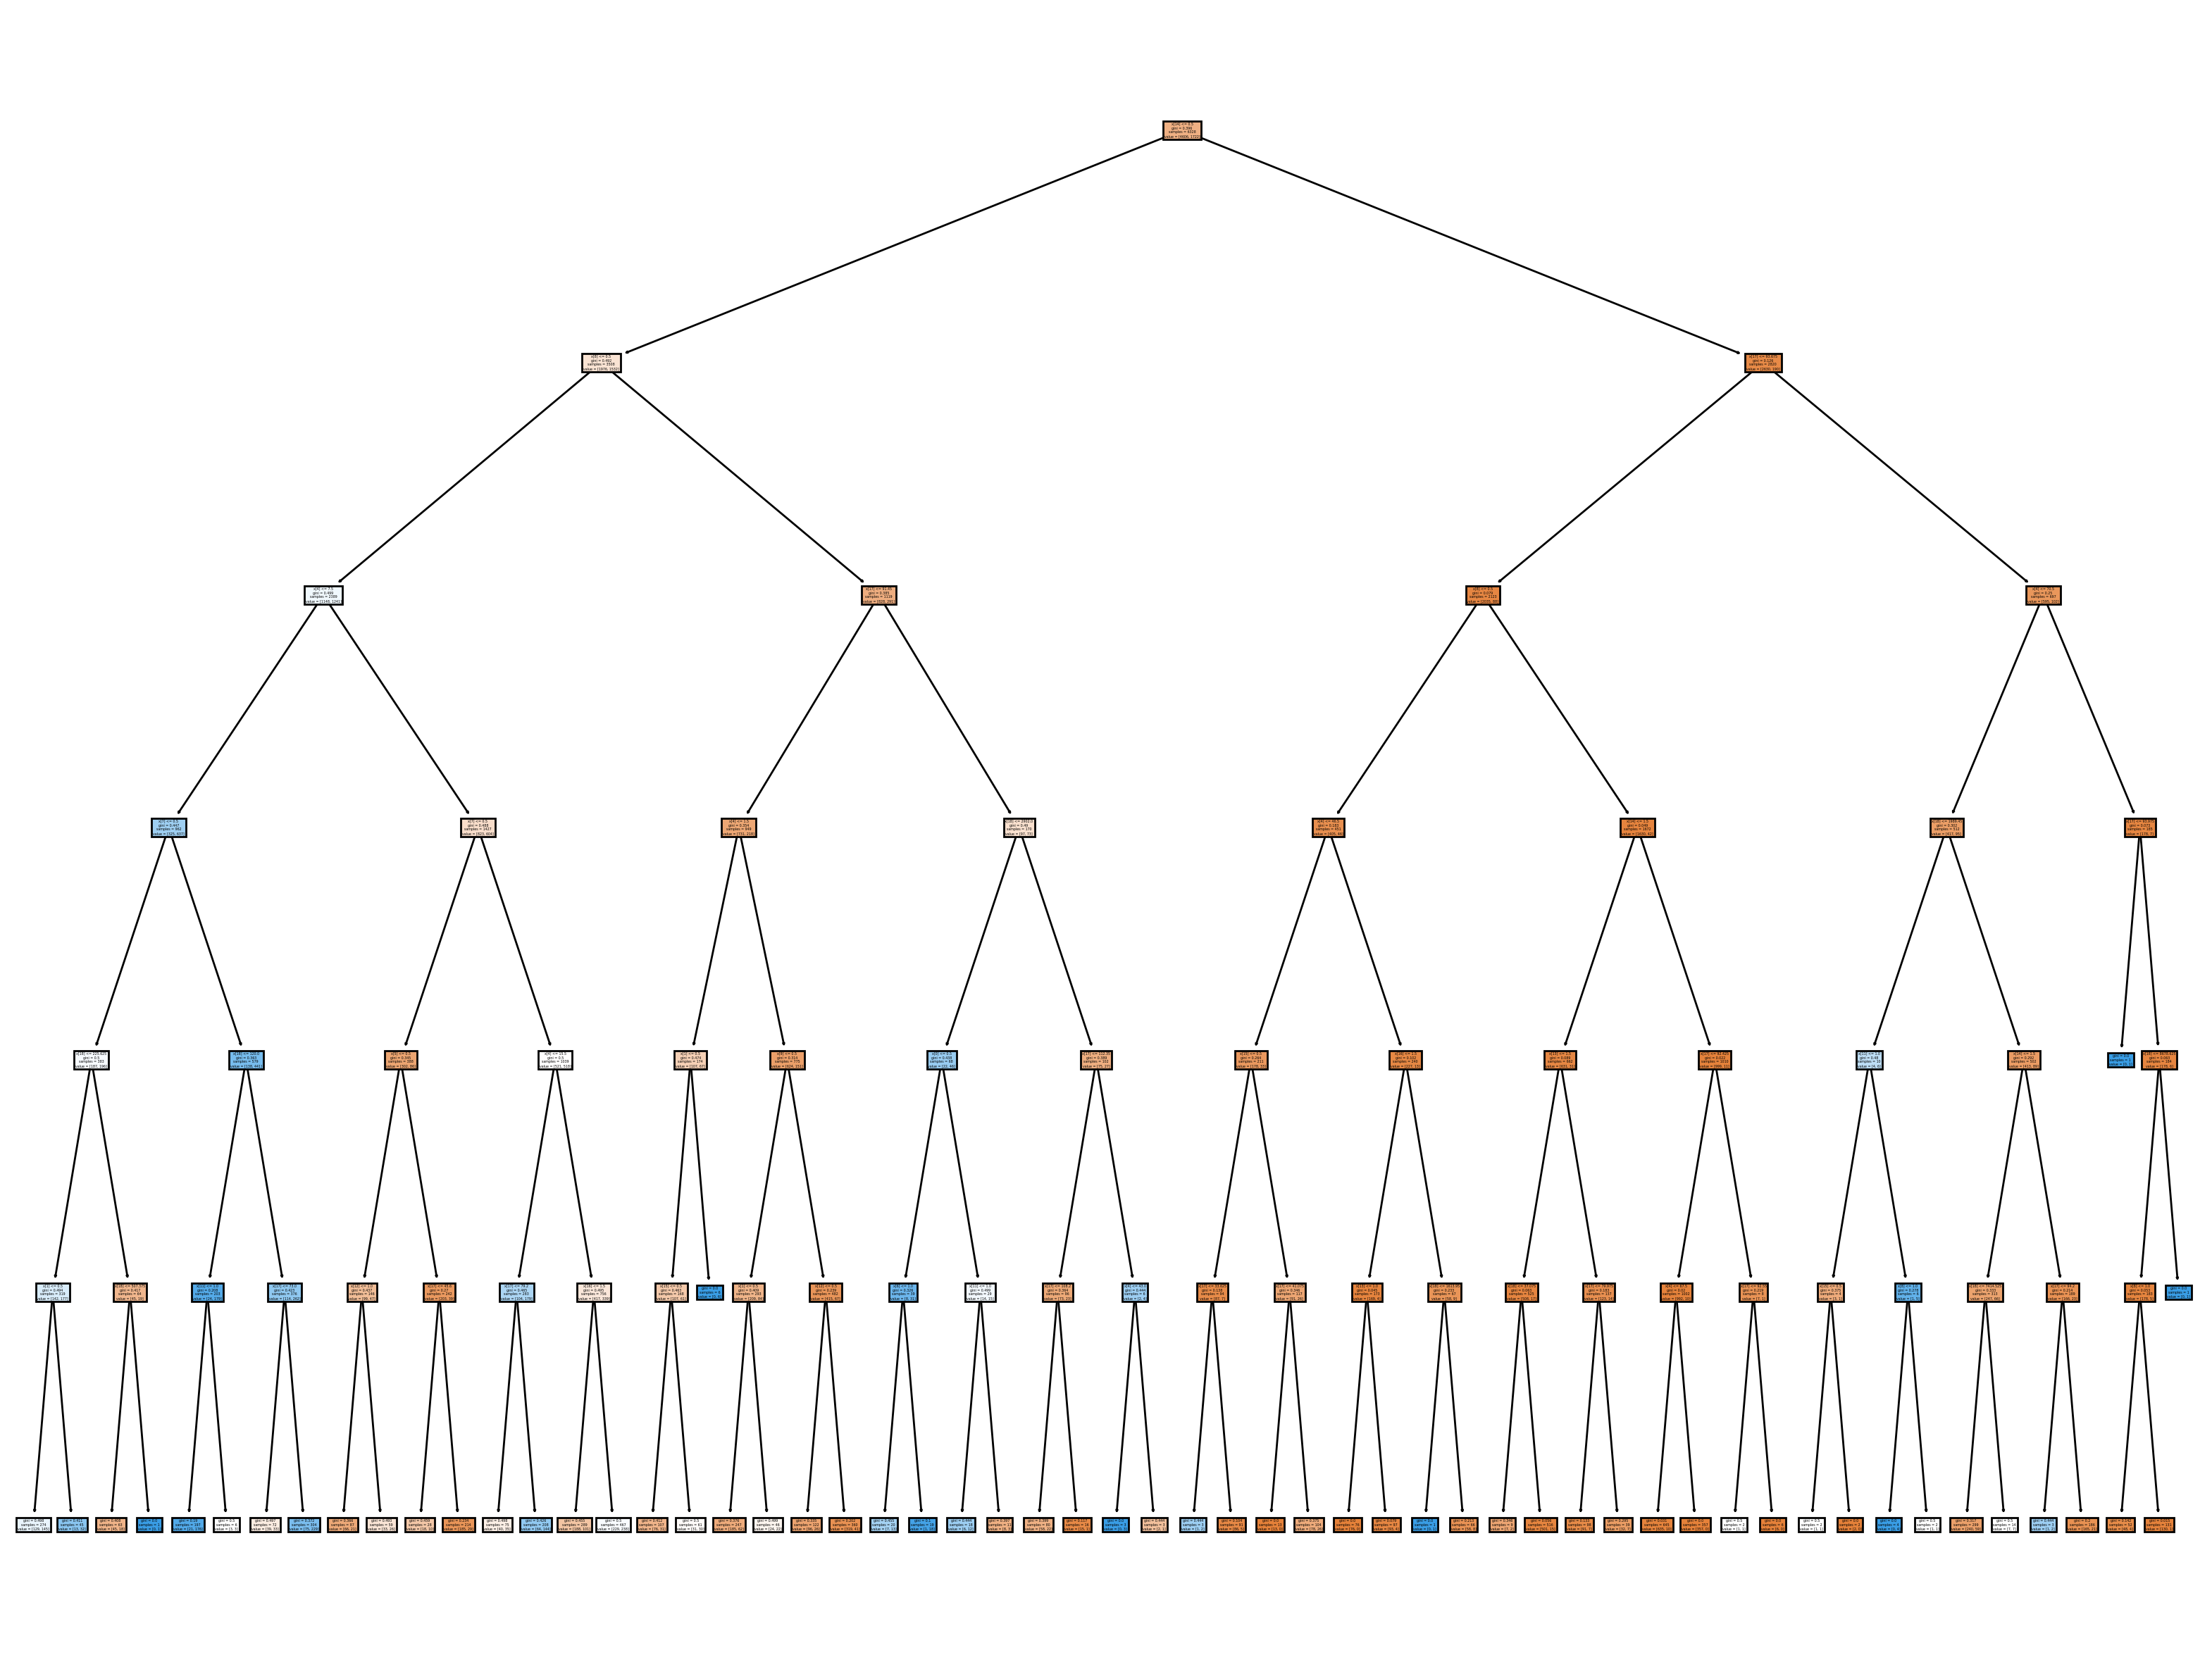

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15), dpi = 200)
plot_tree(model_1, filled=True);

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_2 = RandomForestClassifier()

In [46]:
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_2 = model_2.predict(X_test)

In [49]:
print(classification_report(y_pred_2, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       576
           1       0.45      0.52      0.48       128

    accuracy                           0.80       704
   macro avg       0.67      0.69      0.68       704
weighted avg       0.81      0.80      0.80       704



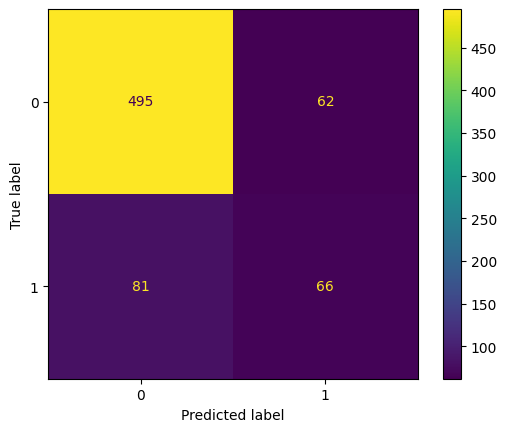

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_2)).plot()
plt.show()

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
model_3 = AdaBoostClassifier()

In [53]:
model_3.fit(X_train, y_train)

AdaBoostClassifier()

In [54]:
y_pred_3 = model_3.predict(X_test)

In [55]:
print(classification_report(y_pred_3, y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       568
           1       0.54      0.59      0.57       136

    accuracy                           0.83       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.83      0.83      0.83       704



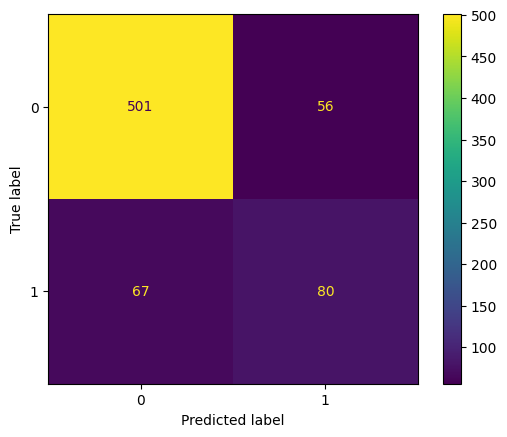

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_3)).plot()
plt.show()